In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import mne
from scipy.stats import linregress

import mni_utils as uti
from mni_plots import plot_corr_tau_sc, plot_sc_fit, plot_stages_diff

### Paths and names

In [3]:
data_path = Path("F:\\iEEG_neural_dynamics\\MNIOpen")
res_dir = "Results_SC_gamma"
res_tau_dir = "Results_gamma"
res_path = data_path.joinpath(res_dir)
res_tau_path = data_path.joinpath(res_tau_dir)

## 1) Load SC parameters, timescales and parcellation

Parcellation:

In [4]:
subjects_dir = str(mne.datasets.sample.data_path()) + "/subjects"
parc_map_name = "HCPMMP1"
annot_file = annot_file = (
    subjects_dir + "/fsaverage/label/lh." + parc_map_name + ".annot"
)
parc_labels, ctab, parc_names = nib.freesurfer.read_annot(annot_file)

SC results and parameters:

In [5]:
# Dataframe with data on all channles pairs
df_sc_stages = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

# Dataframe with the total binned data
df_sc_bins_stages = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}_bins.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

# Dataframe with the fit parameters of df_sc_bins_stages
df_sc_params_stages = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}_fit.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

# Dataframe with the fit parameters on each MNI region
df_sc_params_mni_stages = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}_fit_mni_regs.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}
# Fitted on binned distance:
df_sc_params_mni_stages_bins = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}_fit_mni_regs_bins.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

# Dataframe with the fit parameters on each MMP region
df_sc_params_mmp_stages = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}_fit_mmp_regs.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}
# Fitted on binned distance:
df_sc_params_mmp_stages_bins = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}_fit_mmp_regs_bins.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

Timescales:

In [6]:
# Dataframe with timescales for all electrodes
df_tau = pd.read_csv(
    res_tau_path.joinpath("all_tau.csv"), index_col=0
)
df_tau_fast = pd.read_csv(
    res_tau_path.joinpath("all_knee.csv"), index_col=0
)

# Dataframe with information on parcellated timescales values
df_tau_parc = {
    stage: pd.read_csv(res_tau_path.joinpath(f"tau_parc_{stage}.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}
df_tau_fast_parc = {
    stage: pd.read_csv(res_tau_path.joinpath(f"knee_parc_{stage}.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

## 2) Plot SC parameters globally and for each region

{'W': array([6.77672683, 0.04061218, 0.00891181]), 'N3': array([6.52875625, 0.06279965, 0.01217927]), 'R': array([5.73664806, 0.03969561, 0.00959607])}


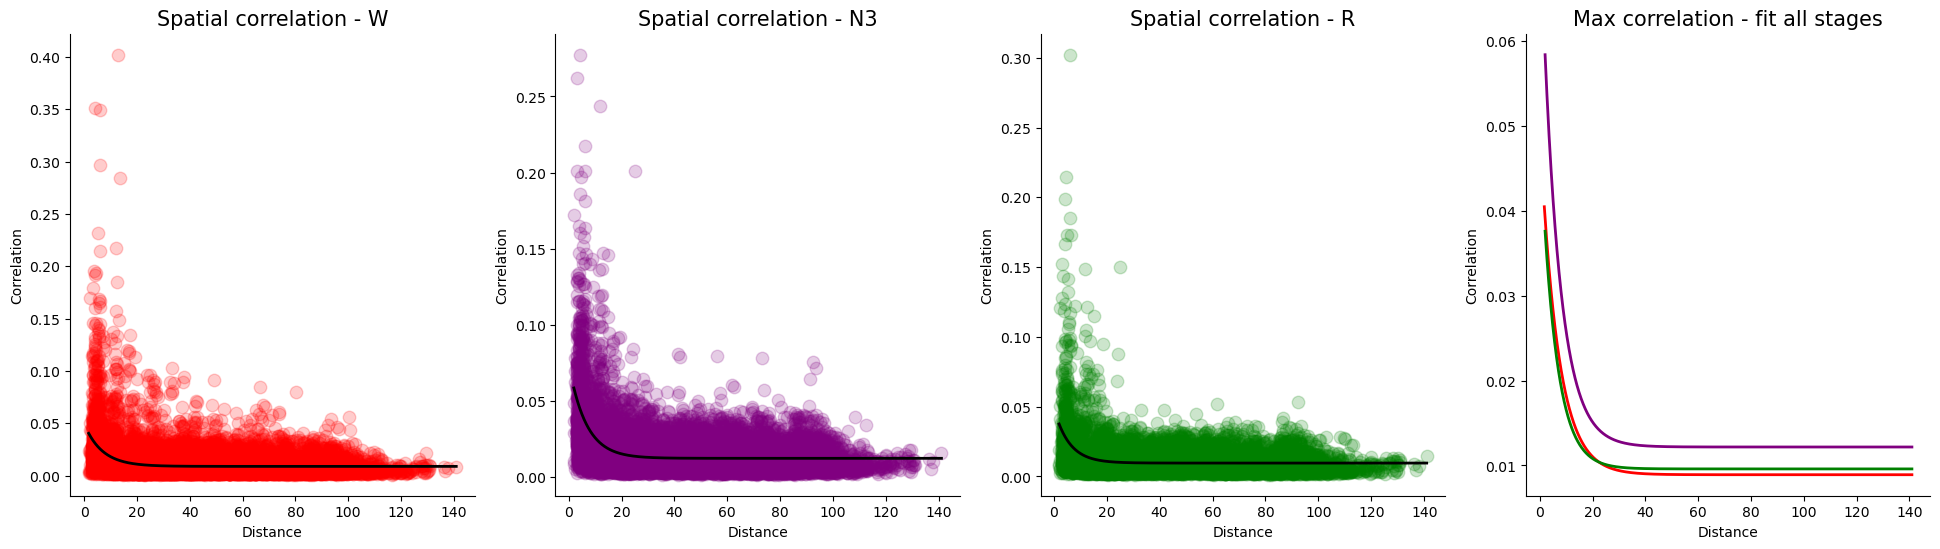

In [17]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}
params_stages = {stage: par.to_numpy().squeeze() for stage, par in df_sc_params_stages.items()}
print(params_stages)
fig, axs = plot_sc_fit(df_sc_stages, params_stages, colors_stage)
plt.show()

Plot of regions, "b" parameter:

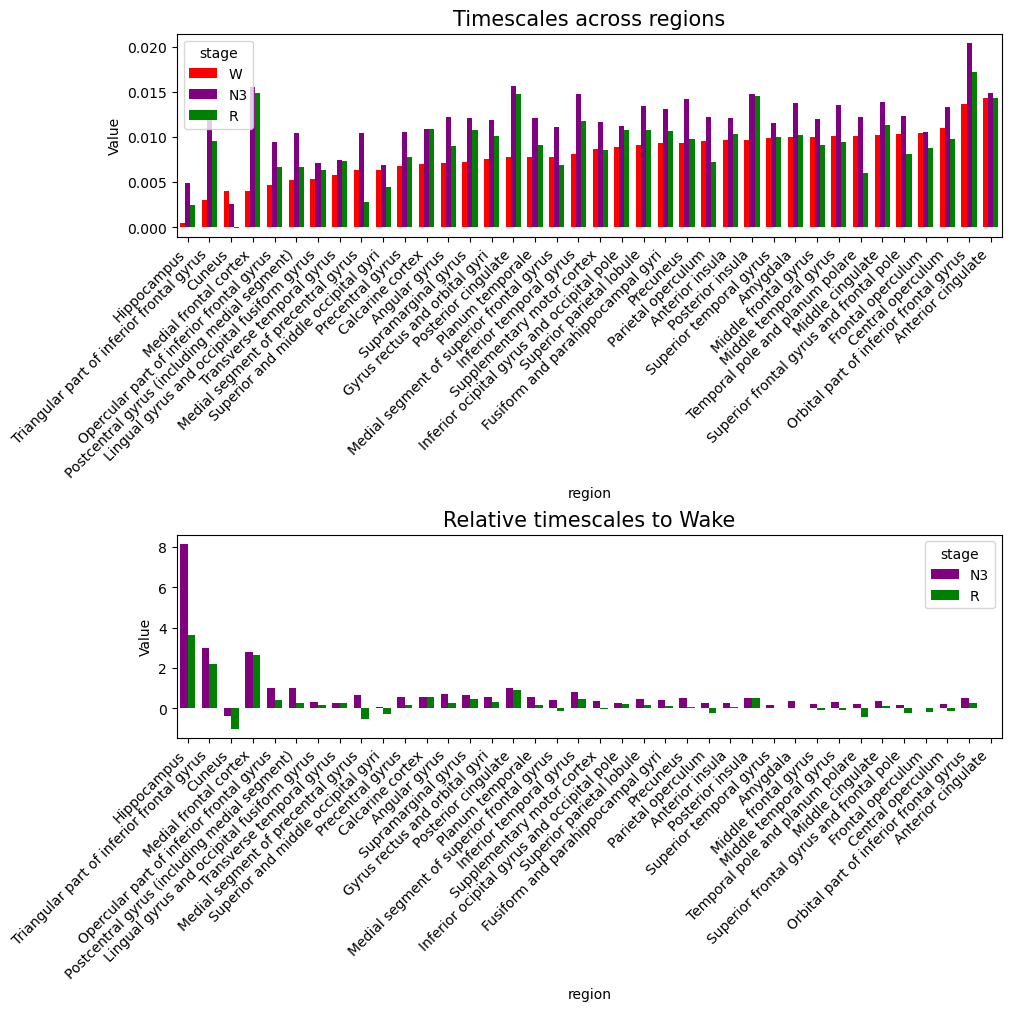

In [19]:
for stage, df in df_sc_params_mni_stages.items():
    if "stage" not in df.columns:
        df.insert(0, "stage", stage) 

df_params = pd.concat(df_sc_params_mni_stages.values())
df_params.reset_index(names="region", inplace=True)

fig, axs = plot_stages_diff(df_params, "b")
plt.show()

## 3) Plot relationship between timescales and SC parameters

With the MNI atlas division:

Stage: W, Param: k
Linregress results: r = 0.25036903346035233, p = 0.129497942457368
Speraman results: r = 0.12791333843965422, p = 0.44407957920433816
Stage: W, Param: a
Linregress results: r = 0.016443925952226338, p = 0.9219422245664268
Speraman results: r = 0.05372579056789582, p = 0.7486983845924013
Stage: W, Param: b
Linregress results: r = -0.21164299121309316, p = 0.20210385746680248
Speraman results: r = -0.1465149359886202, p = 0.3800748815116425


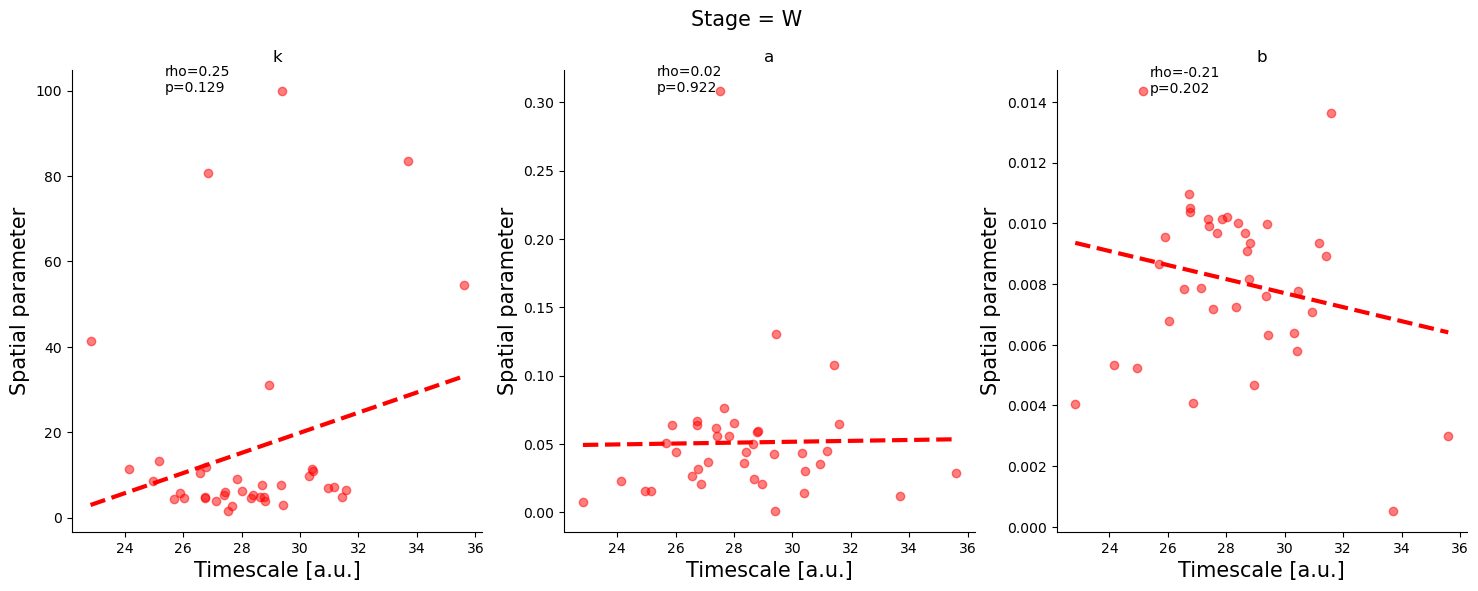

Stage: N3, Param: k
Linregress results: r = 0.32951967015216327, p = 0.04335675027681253
Speraman results: r = 0.14695262063683115, p = 0.3786376102423843
Stage: N3, Param: a
Linregress results: r = 0.26723969726200697, p = 0.1048034679234575
Speraman results: r = 0.22223438012911695, p = 0.17991338105942042
Stage: N3, Param: b
Linregress results: r = -0.3793968249251587, p = 0.018812521537420662
Speraman results: r = -0.19619214356056458, p = 0.2377915939667883


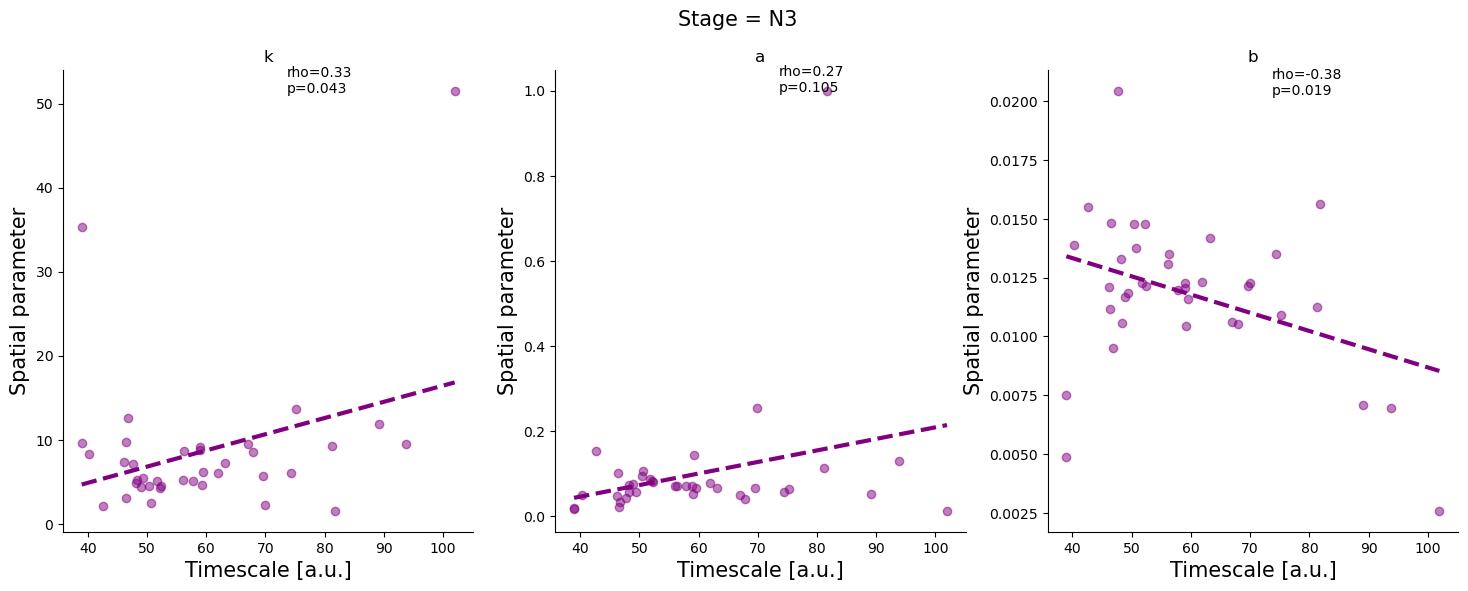

Stage: R, Param: k
Linregress results: r = -0.016047133170523396, p = 0.9238202033118833
Speraman results: r = 0.15582426023214155, p = 0.3502001350655176
Stage: R, Param: a
Linregress results: r = -0.022329039168252594, p = 0.8941429022772744
Speraman results: r = 0.17890359995623153, p = 0.28251112901781217
Stage: R, Param: b
Linregress results: r = -0.1931025460241687, p = 0.2454091937764275
Speraman results: r = -0.1915964547543495, p = 0.2491813274215194


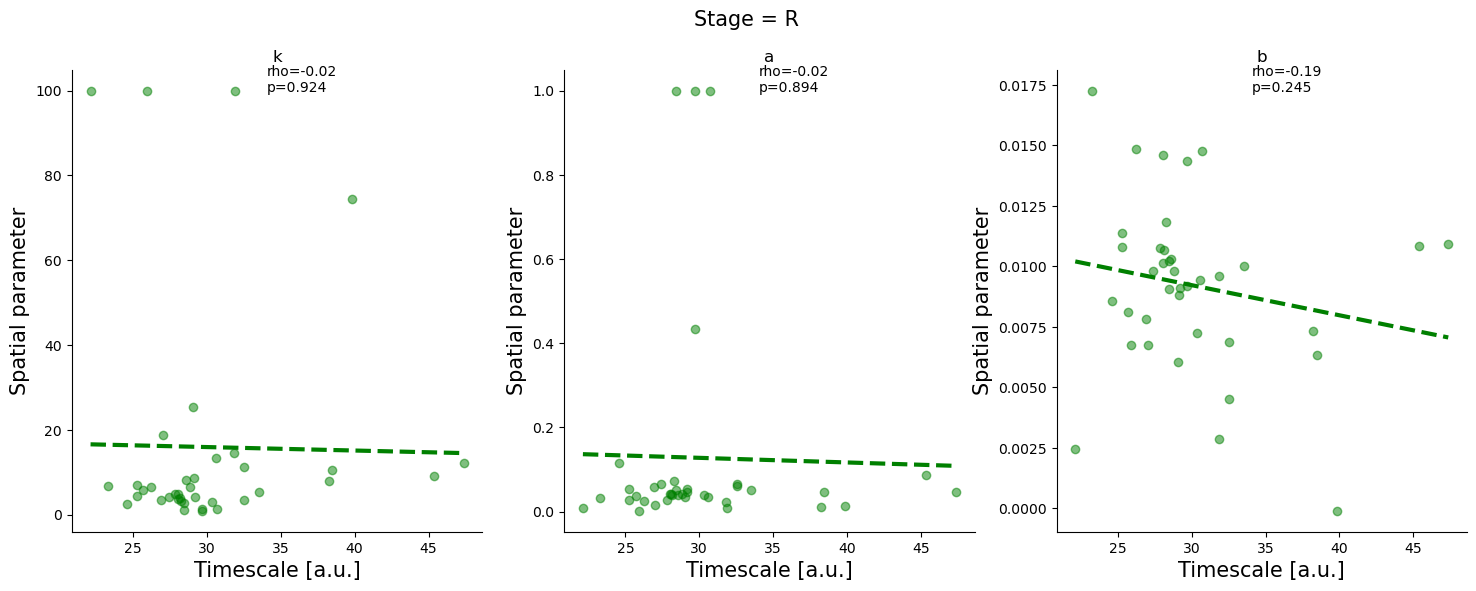

In [7]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mni = uti.get_avg_tau_mni(df_tau[df_tau["stage"] == stage].copy())

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mni_stages[stage][param].astype(float)
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mni, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

With the MMP atlas division:

Stage: W, Param: k
Linregress results: r = 0.08973704385211419, p = 0.2621667896074436
Speraman results: r = 0.01080232475886758, p = 0.8928420518595843
Stage: W, Param: a
Linregress results: r = -0.07955667435181889, p = 0.320394538152342
Speraman results: r = -0.09702613031844091, p = 0.2252142582228631
Stage: W, Param: b
Linregress results: r = 0.017745580880039535, p = 0.8248551449979193
Speraman results: r = -0.0004609353488732945, p = 0.9954138946428863


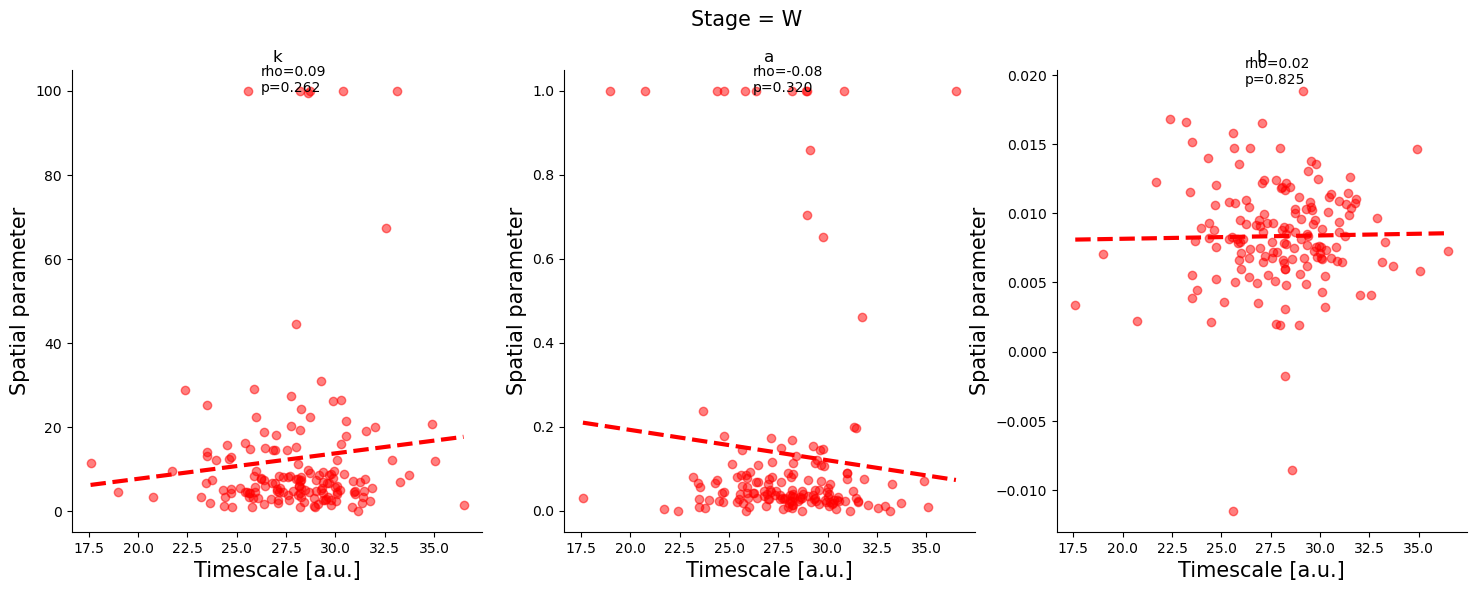

Stage: N3, Param: k
Linregress results: r = 0.035911114078992626, p = 0.6583755685313326
Speraman results: r = 0.15493905299055885, p = 0.05502474240583243
Stage: N3, Param: a
Linregress results: r = -0.02159728892114833, p = 0.7903449491770854
Speraman results: r = 0.050877099309182064, p = 0.5309016494818704
Stage: N3, Param: b
Linregress results: r = -0.1820439057475187, p = 0.023845145894754696
Speraman results: r = -0.18990939484298122, p = 0.018323150267989415


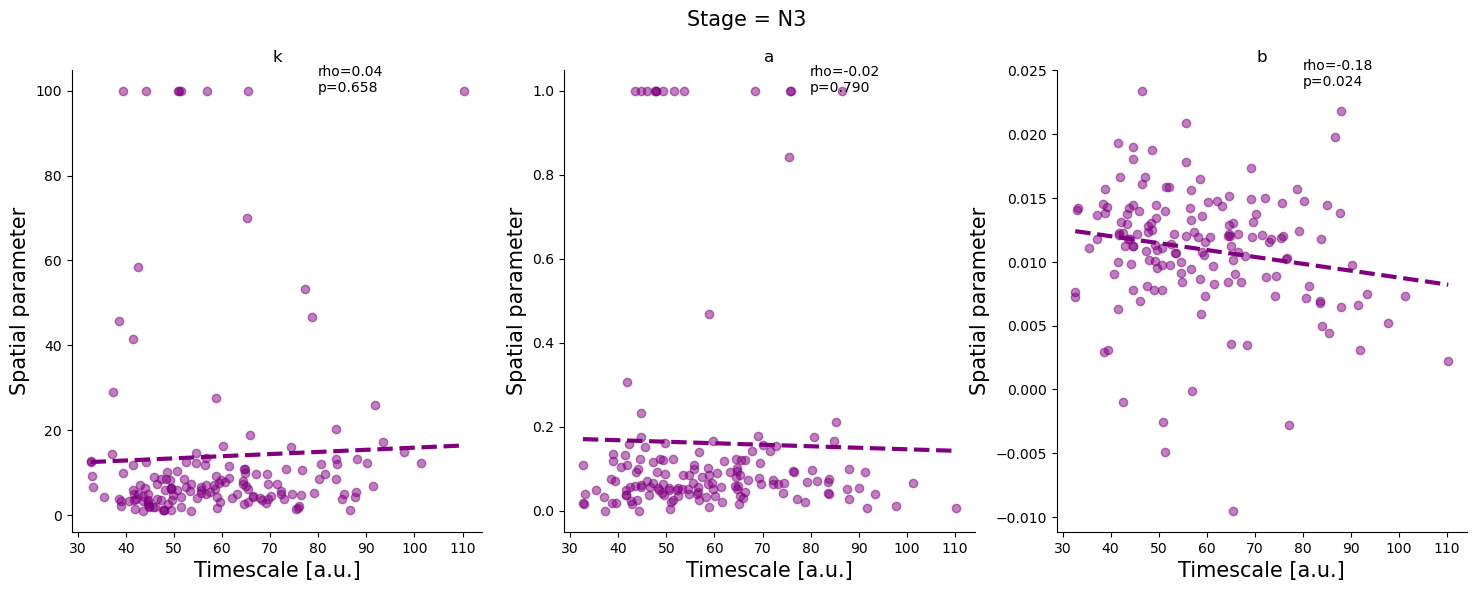

Stage: R, Param: k
Linregress results: r = 0.22719630163858334, p = 0.007151961046963197
Speraman results: r = 0.007923101688607477, p = 0.9262452509504818
Stage: R, Param: a
Linregress results: r = -0.015896695353210658, p = 0.8526497824420755
Speraman results: r = 0.06399821259406213, p = 0.4541694864966609
Stage: R, Param: b
Linregress results: r = -0.49332372851978806, p = 6.823639427567235e-10
Speraman results: r = -0.20414227624111891, p = 0.015930255175901777


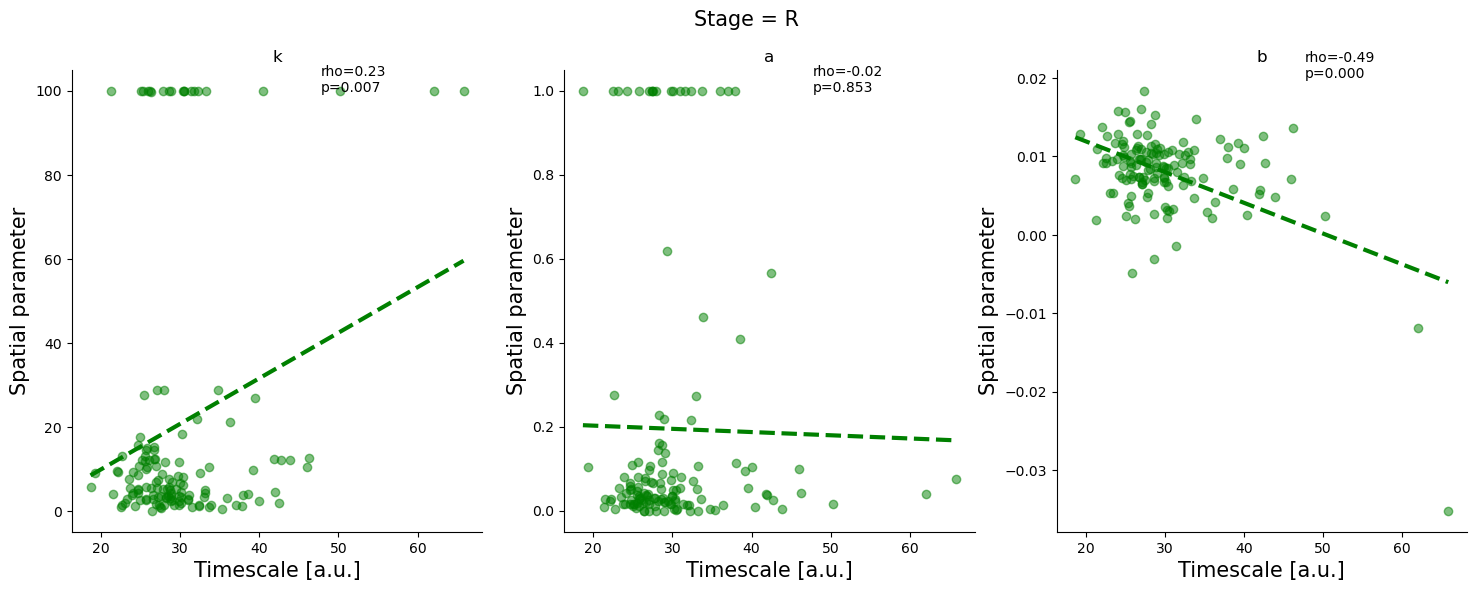

In [8]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mmp = df_tau_parc[stage].copy()

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mmp_stages[stage][param].astype(float)
        df_spa.dropna(inplace=True)
        # Check same regions are present
        df_tau_stage_mmp = df_tau_stage_mmp[df_tau_stage_mmp.index.isin(df_spa.index)]
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mmp, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

## 4) Plot relationship between timescales and SC parameters (binned distance)

With the MNI atlas division:

Stage: W, Param: k
Linregress results: r = 0.25274210658943785, p = 0.1257846765441763
Speraman results: r = 0.13356691293935882, p = 0.42403017671841303
Stage: W, Param: a
Linregress results: r = 0.06773335999433057, p = 0.6861735887703995
Speraman results: r = -0.0771419192471824, p = 0.6452747298608088
Stage: W, Param: b
Linregress results: r = -0.34516371131541557, p = 0.033806888172257965
Speraman results: r = -0.27475653791443266, p = 0.09503066339078191


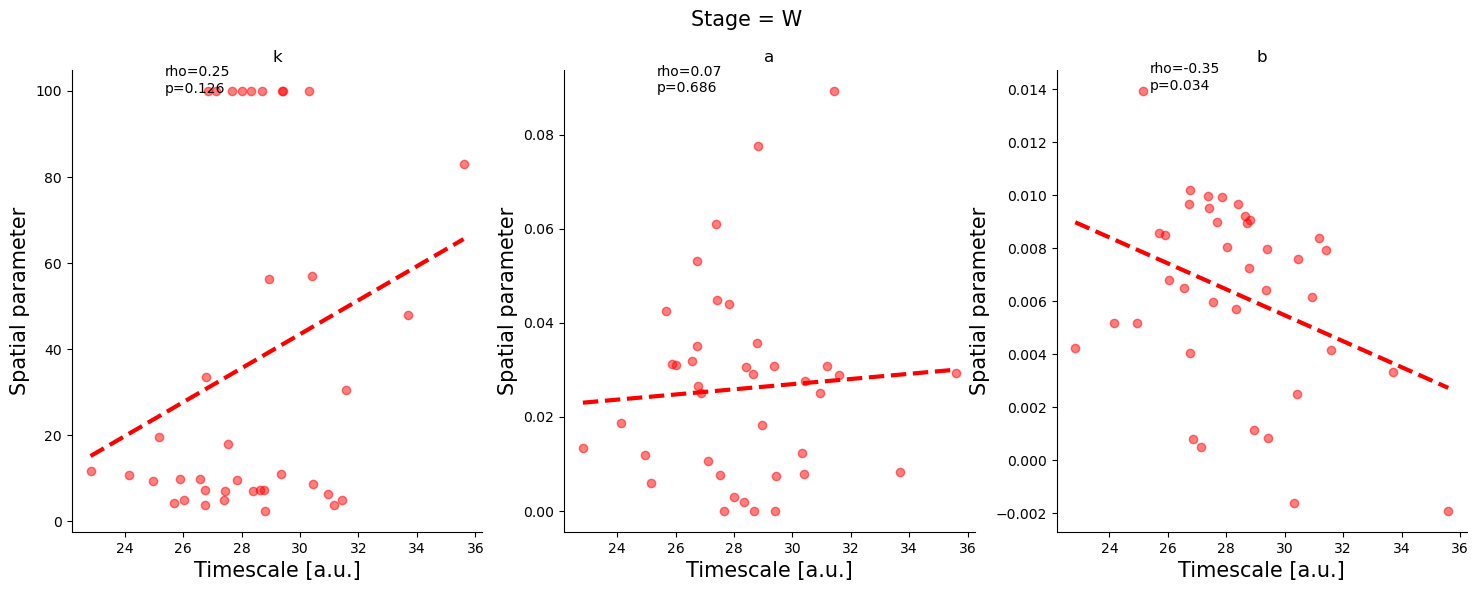

Stage: N3, Param: k
Linregress results: r = -0.22891965061770547, p = 0.16683253638140016
Speraman results: r = -0.021555968924389976, p = 0.8977882485025146
Stage: N3, Param: a
Linregress results: r = 0.36681680396783833, p = 0.023495184674052528
Speraman results: r = 0.28088412298938614, p = 0.08759425968380745
Stage: N3, Param: b
Linregress results: r = -0.08918015169286339, p = 0.5944198934007243
Speraman results: r = -0.12353649195754458, p = 0.45995033914941474


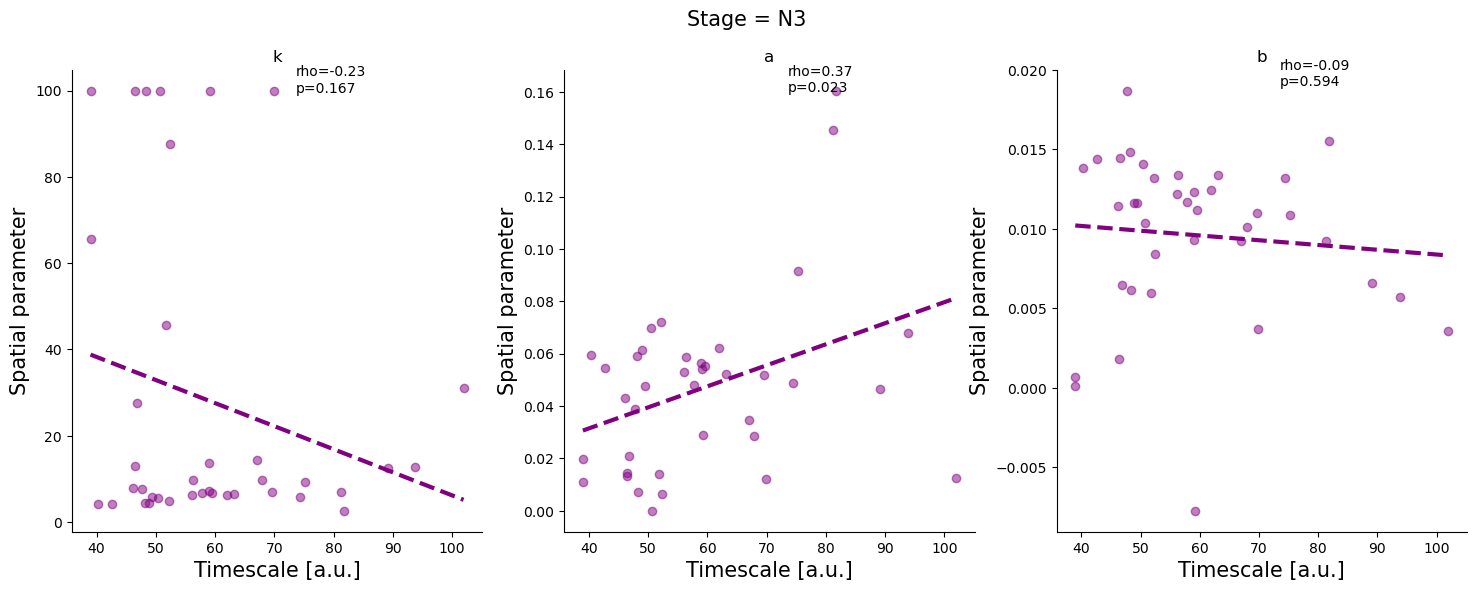

Stage: R, Param: k
Linregress results: r = -0.19953610399017027, p = 0.22972885588899644
Speraman results: r = 0.04105540356742586, p = 0.8066644575276858
Stage: R, Param: a
Linregress results: r = 0.433916378551389, p = 0.006493486748169743
Speraman results: r = 0.2106357369515264, p = 0.20430942360901777
Stage: R, Param: b
Linregress results: r = -0.0645475691572109, p = 0.7002314539128327
Speraman results: r = -0.19334719334719333, p = 0.24480009486897922


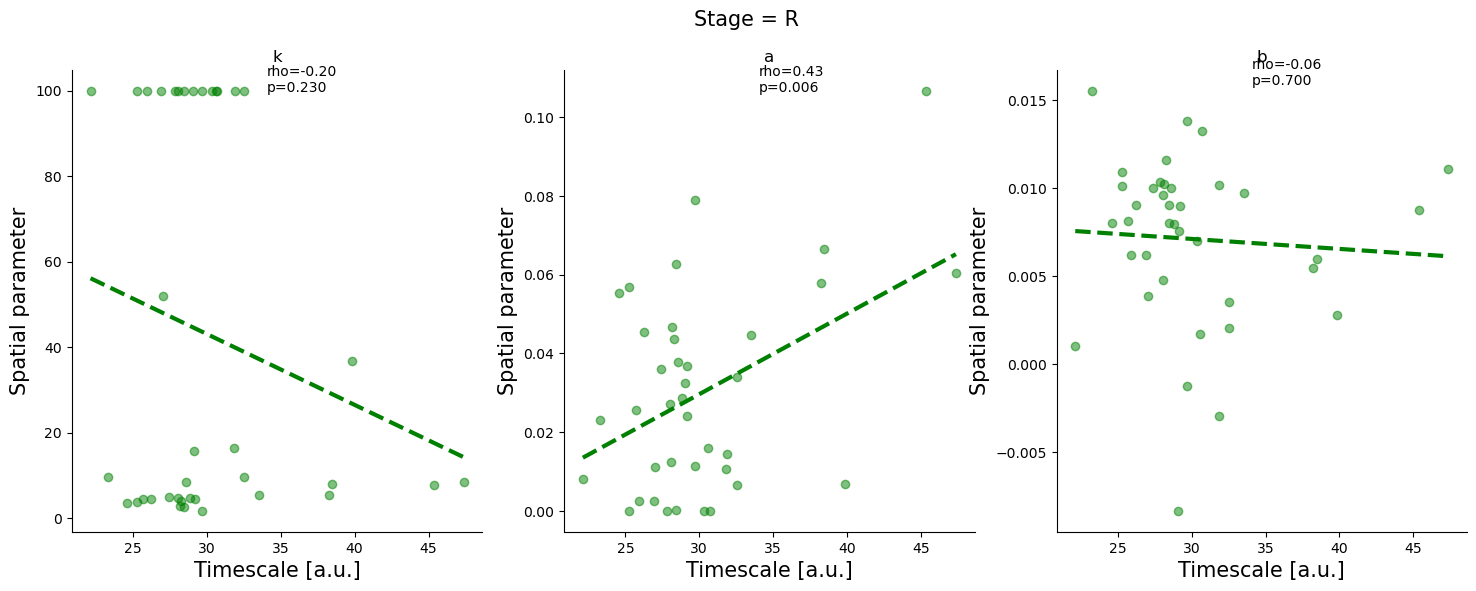

In [9]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mni = uti.get_avg_tau_mni(df_tau[df_tau["stage"] == stage].copy())

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mni_stages_bins[stage][param].astype(float)
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mni, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

With the MMP atlas division:

Stage: W, Param: k
Linregress results: r = 0.012285356007343063, p = 0.8766935530953429
Speraman results: r = 0.1086666575385455, p = 0.1686760892788014
Stage: W, Param: a
Linregress results: r = -0.14194895100175128, p = 0.07156743138455307
Speraman results: r = 0.01588995160614259, p = 0.8409389258010865
Stage: W, Param: b
Linregress results: r = -0.11726877408731372, p = 0.1372361348678486
Speraman results: r = -0.11120990288768363, p = 0.1588693637640651


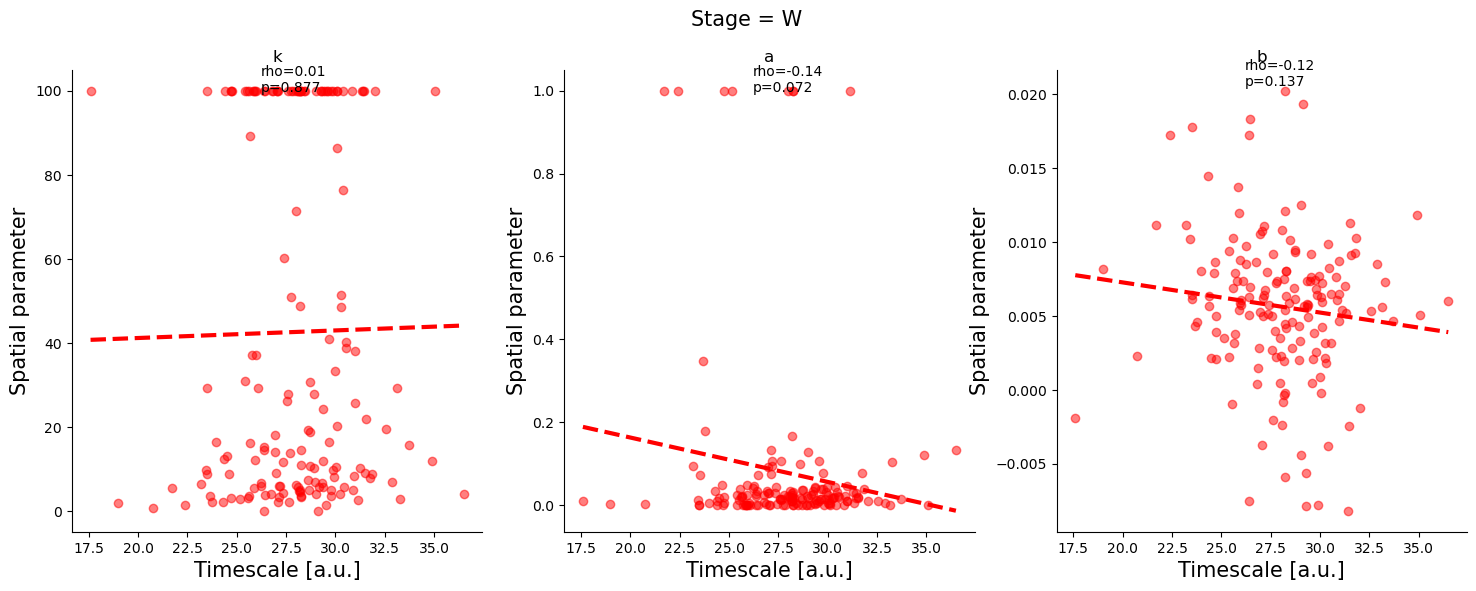

Stage: N3, Param: k
Linregress results: r = -0.06577068879458901, p = 0.41312568404346683
Speraman results: r = -0.006304984821790623, p = 0.9375331773946305
Stage: N3, Param: a
Linregress results: r = -0.0030960831294968775, p = 0.9693018710396463
Speraman results: r = 0.16760833297155153, p = 0.035886544041846394
Stage: N3, Param: b
Linregress results: r = -0.1109982222917468, p = 0.16636757917797806
Speraman results: r = -0.14387338050967818, p = 0.07222660492076657


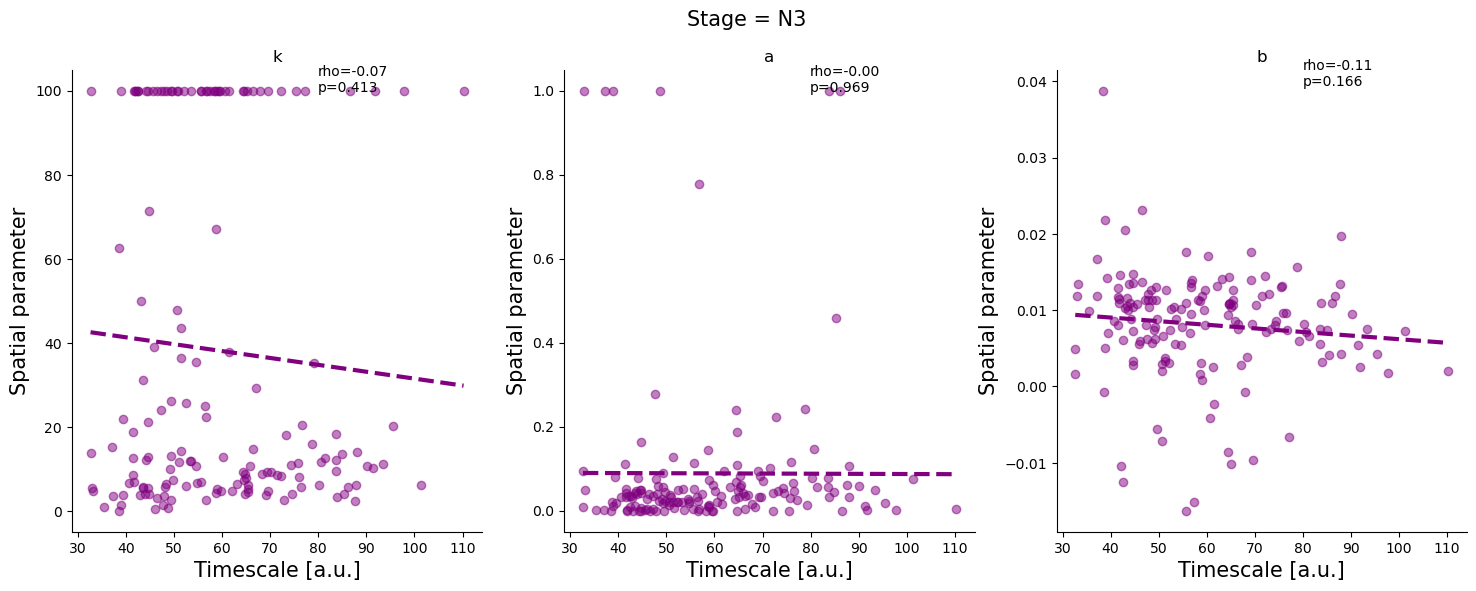

Stage: R, Param: k
Linregress results: r = 0.06814897537531645, p = 0.42033025797366297
Speraman results: r = 0.027079415011134776, p = 0.7490479210056357
Stage: R, Param: a
Linregress results: r = -0.0014292297663334997, p = 0.98653177977909
Speraman results: r = 0.028961180073801947, p = 0.7322502470249743
Stage: R, Param: b
Linregress results: r = -0.16552681938857555, p = 0.04899355059958102
Speraman results: r = -0.06862032184177824, p = 0.41711583058279456


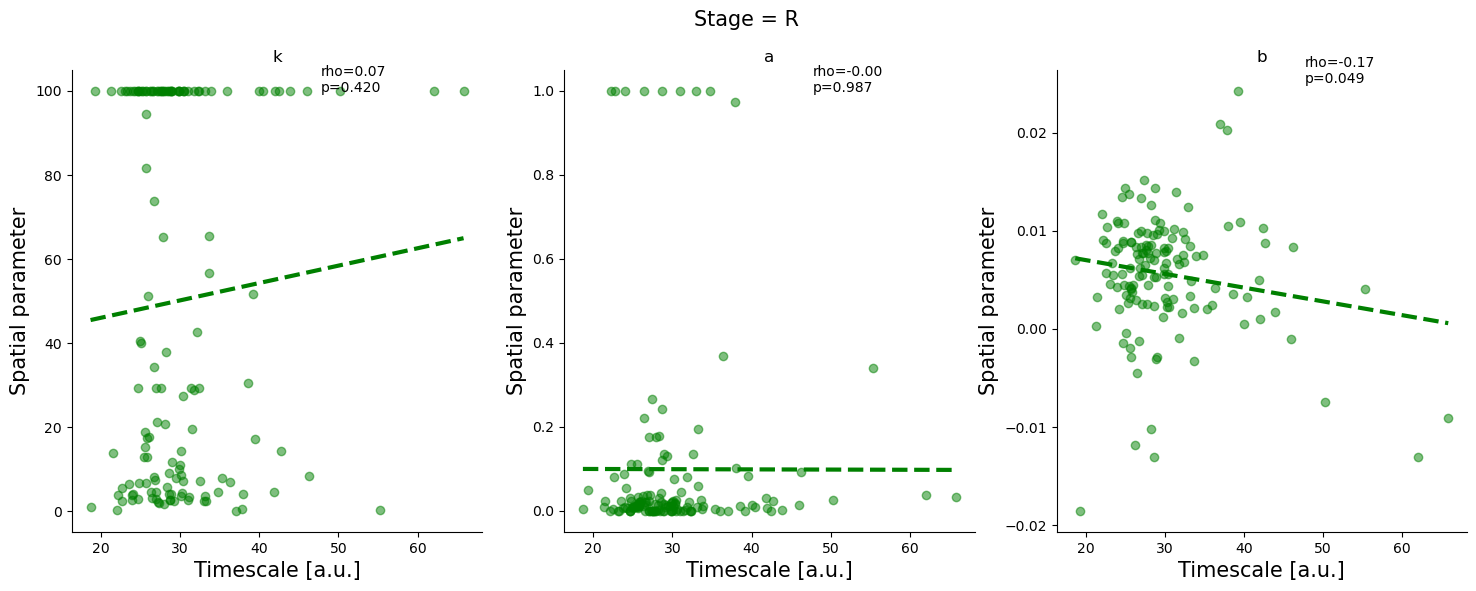

In [10]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mmp = df_tau_parc[stage].copy()

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mmp_stages_bins[stage][param].astype(float)
        df_spa.dropna(inplace=True)
        # Check same regions are present
        df_tau_stage_mmp = df_tau_stage_mmp[df_tau_stage_mmp.index.isin(df_spa.index)]
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mmp, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

## 5) Plot relationship between fast timescales and SC parameters

With the MNI atlas division:

Stage: W, Param: k
Linregress results: r = -0.35303019313960493, p = 0.029699966757944715
Speraman results: r = -0.2622825254404202, p = 0.11165458273977205
Stage: W, Param: a
Linregress results: r = 0.14415378178927946, p = 0.38788367818207936
Speraman results: r = 0.24411861253966516, p = 0.13966767407433728
Stage: W, Param: b
Linregress results: r = -0.13046449199662788, p = 0.4349689171453668
Speraman results: r = -0.13732355837618995, p = 0.4109933969191528


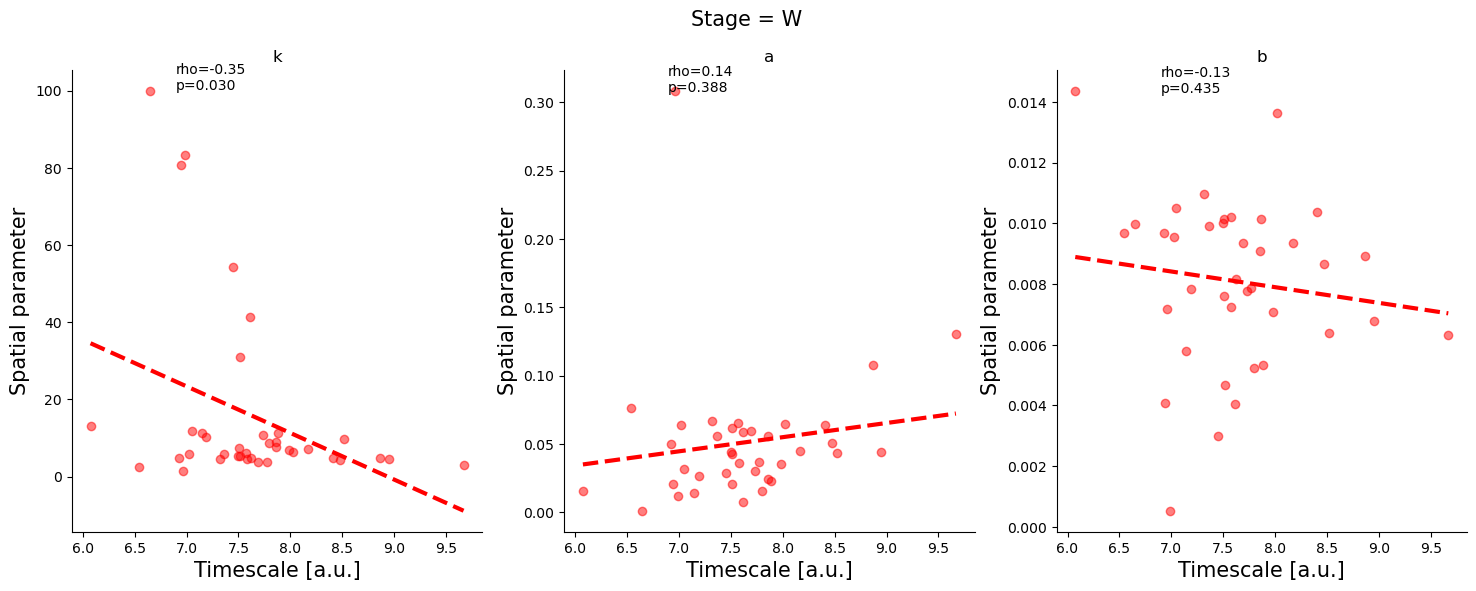

Stage: N3, Param: k
Linregress results: r = 0.22752551810934873, p = 0.16950219810386555
Speraman results: r = 0.22595469963891016, p = 0.17254679480232116
Stage: N3, Param: a
Linregress results: r = 0.17878161518248928, p = 0.2828448467811523
Speraman results: r = -0.02308786519312835, p = 0.8905668041341129
Stage: N3, Param: b
Linregress results: r = -0.43768998614092997, p = 0.005993639773749406
Speraman results: r = -0.5277382645803699, p = 0.000661659510705113


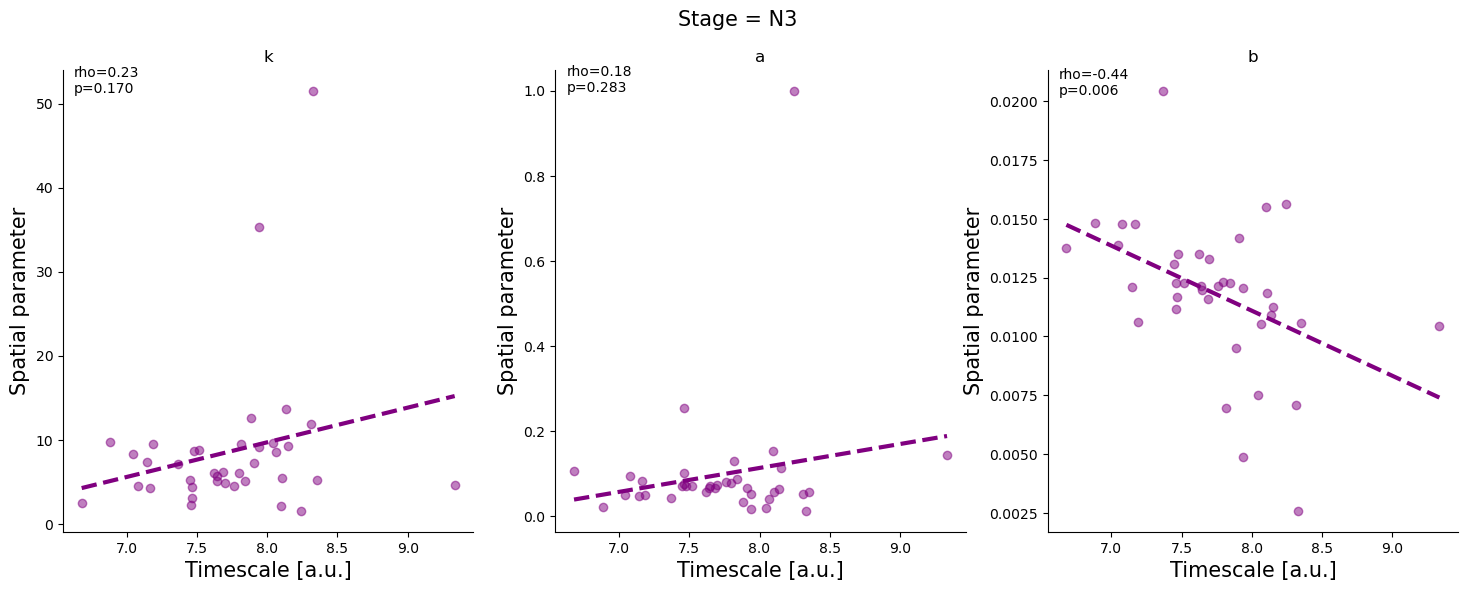

Stage: R, Param: k
Linregress results: r = -0.039866385025355715, p = 0.812161980615209
Speraman results: r = 0.17661541854963234, p = 0.2888135804424372
Stage: R, Param: a
Linregress results: r = -0.12654892122371791, p = 0.44899465440752184
Speraman results: r = -0.010613852719115878, p = 0.9495720118142815
Stage: R, Param: b
Linregress results: r = -0.22886090891479047, p = 0.16694440806505195
Speraman results: r = -0.29861035124193014, p = 0.06859670272985303


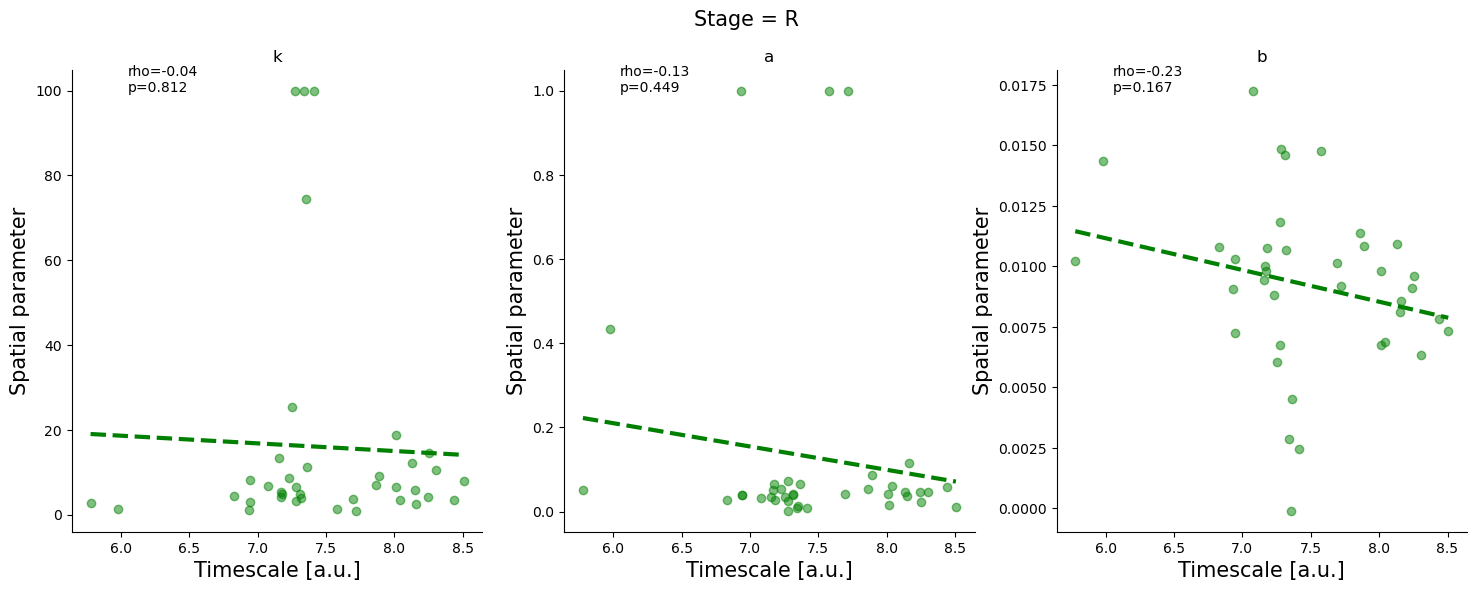

In [11]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mni = uti.get_avg_tau_mni(df_tau_fast[df_tau_fast["stage"] == stage].copy())

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mni_stages[stage][param].astype(float)
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mni, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

With the MMP atlas division:

Stage: W, Param: k
Linregress results: r = -0.11532767582599197, p = 0.14903314942902823
Speraman results: r = -0.05077746769838627, p = 0.5263394423073633
Stage: W, Param: a
Linregress results: r = 0.09898694659345661, p = 0.21593552432393318
Speraman results: r = 0.13946869214538782, p = 0.08051142575940956
Stage: W, Param: b
Linregress results: r = -0.035030987747935435, p = 0.6621327703273496
Speraman results: r = -0.12842449863773067, p = 0.10780903758468645


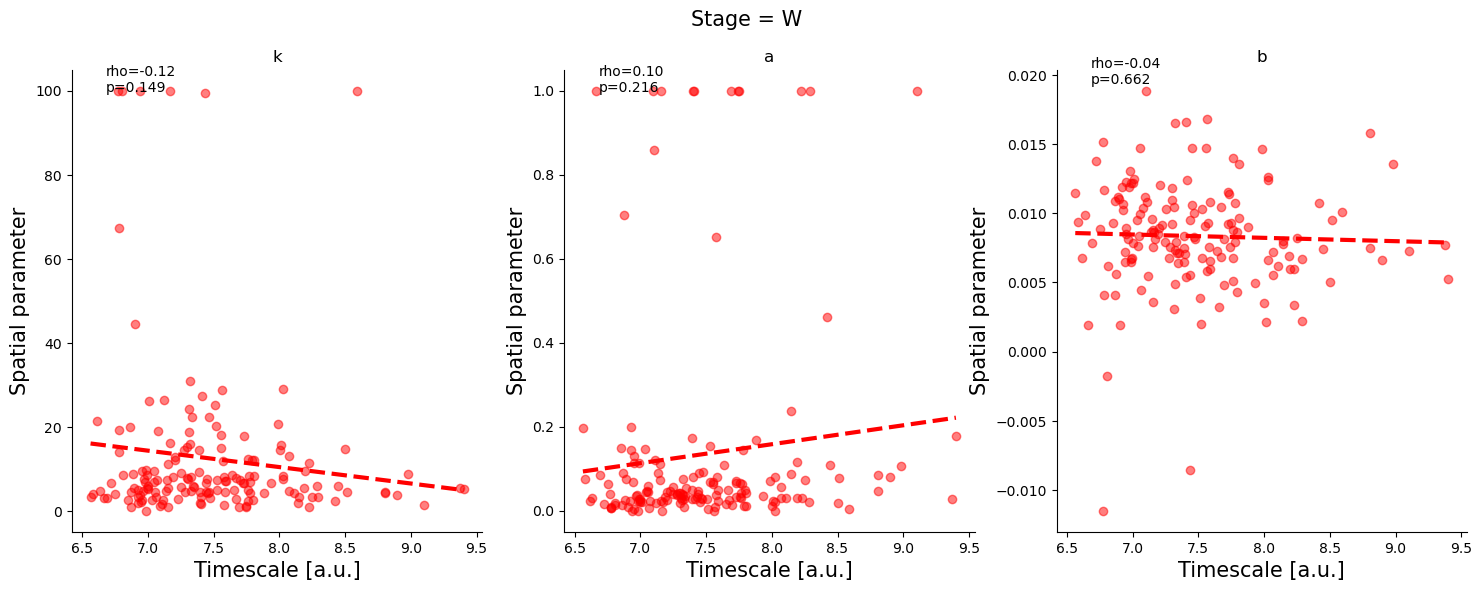

Stage: N3, Param: k
Linregress results: r = -0.14806061505599838, p = 0.0668728388385972
Speraman results: r = -0.07315119737731947, p = 0.3672719909728779
Stage: N3, Param: a
Linregress results: r = 0.19947893951668838, p = 0.013127925142862868
Speraman results: r = 0.200406615930356, p = 0.012700681510326517
Stage: N3, Param: b
Linregress results: r = 0.03933567463773267, p = 0.6281351271749558
Speraman results: r = -0.04025563304500686, p = 0.6201130121843508


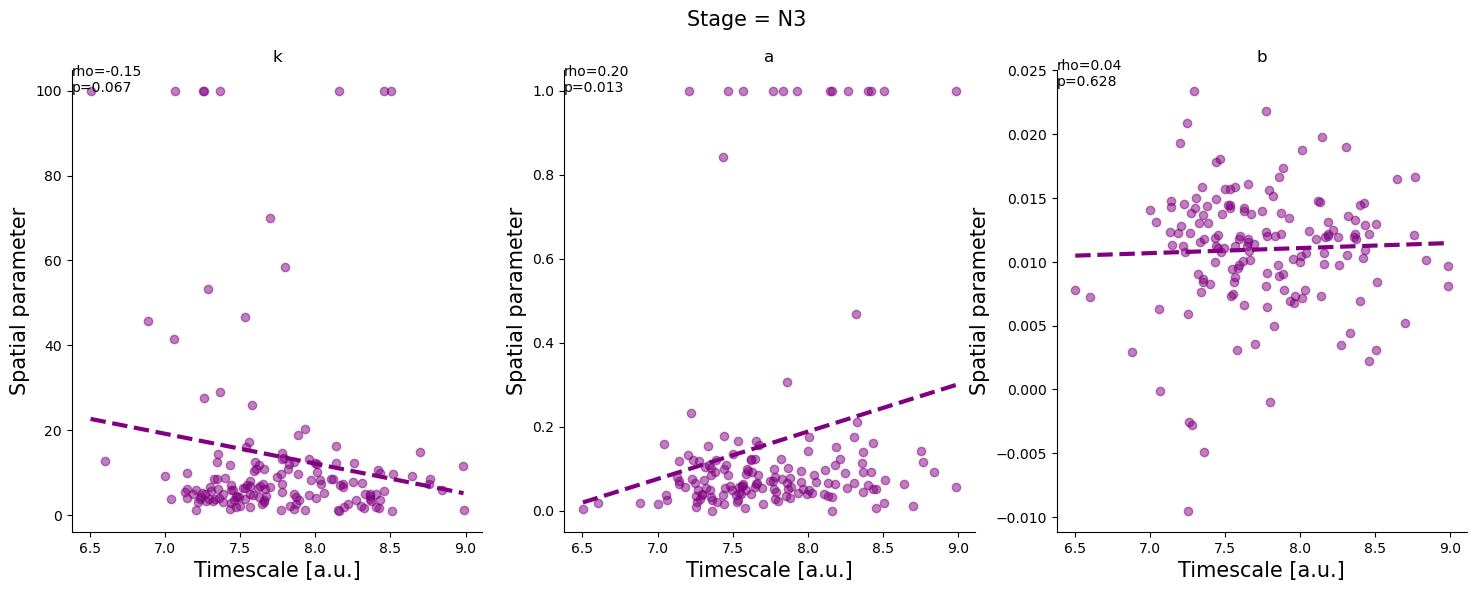

Stage: R, Param: k
Linregress results: r = -0.20955086419541472, p = 0.013293399983959227
Speraman results: r = 0.0010993136014649967, p = 0.9897525068537529
Stage: R, Param: a
Linregress results: r = -0.16344185689647373, p = 0.05454305205085705
Speraman results: r = 0.02518907445836673, p = 0.7684982881288202
Stage: R, Param: b
Linregress results: r = 0.1301157553098704, p = 0.12683881154674476
Speraman results: r = 0.12779391393717324, p = 0.13381745441962029


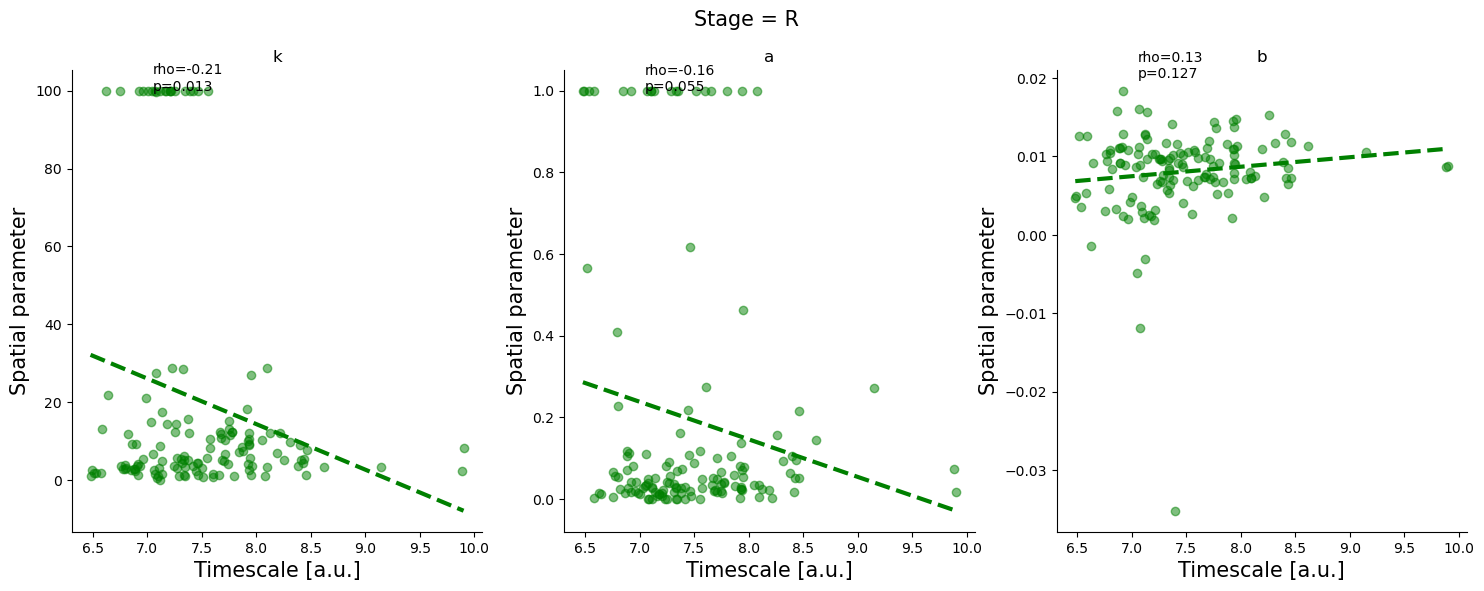

In [12]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mmp = df_tau_fast_parc[stage].copy()

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mmp_stages[stage][param].astype(float)
        df_spa.dropna(inplace=True)
        # Check same regions are present
        df_tau_stage_mmp = df_tau_stage_mmp[df_tau_stage_mmp.index.isin(df_spa.index)]
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mmp, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

## 6) Plot relationship between fast timescales and SC parameters (binned distance)

With the MNI atlas division:

Stage: W, Param: k
Linregress results: r = -0.06741002849255245, p = 0.6875957086819853
Speraman results: r = -0.2826801386962495, p = 0.08550213861914473
Stage: W, Param: a
Linregress results: r = 0.31539260247955997, p = 0.05375396852900636
Speraman results: r = 0.26862895283947913, p = 0.10294200043239447
Stage: W, Param: b
Linregress results: r = -0.23113295209219653, p = 0.16265660120191344
Speraman results: r = -0.11478279899332532, p = 0.4925834487928813


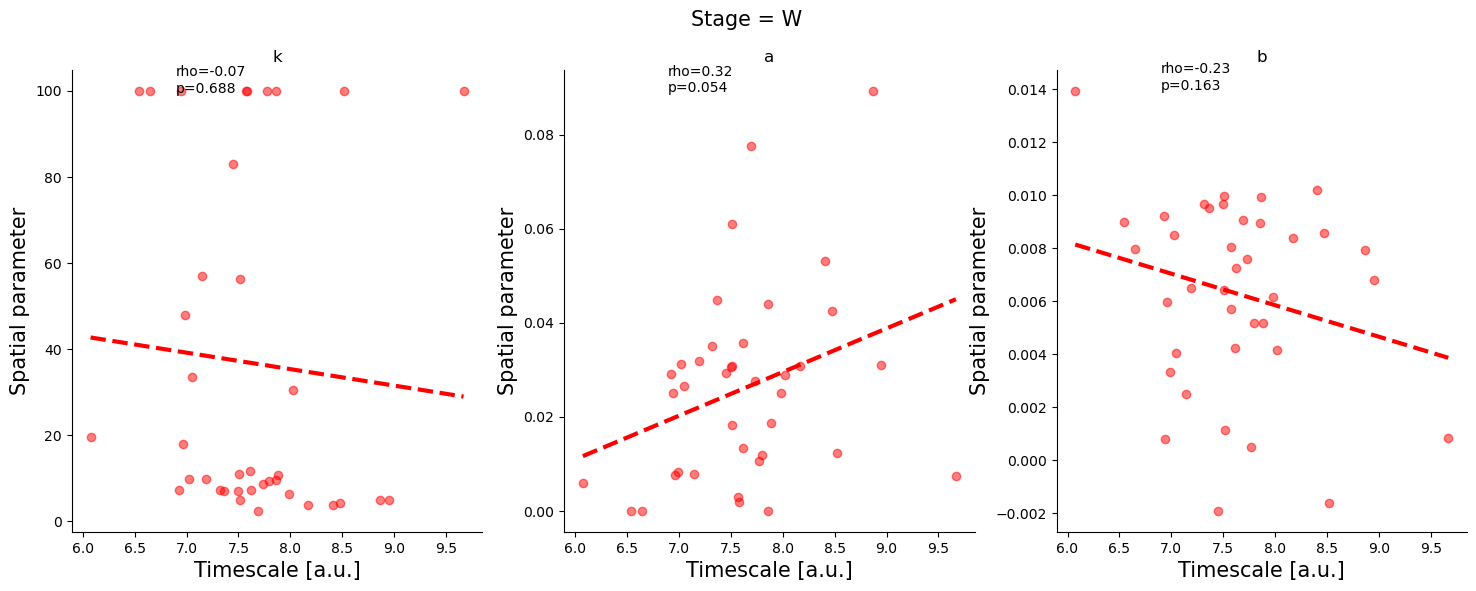

Stage: N3, Param: k
Linregress results: r = 0.1818492346496651, p = 0.2745302714647793
Speraman results: r = 0.11740890688259109, p = 0.4826705829132041
Stage: N3, Param: a
Linregress results: r = 0.12379306638215563, p = 0.4590116782988529
Speraman results: r = -0.016960280118174857, p = 0.9194989997241863
Stage: N3, Param: b
Linregress results: r = -0.5267670763154152, p = 0.0006798384235589509
Speraman results: r = -0.3664514717146296, p = 0.023644457838382045


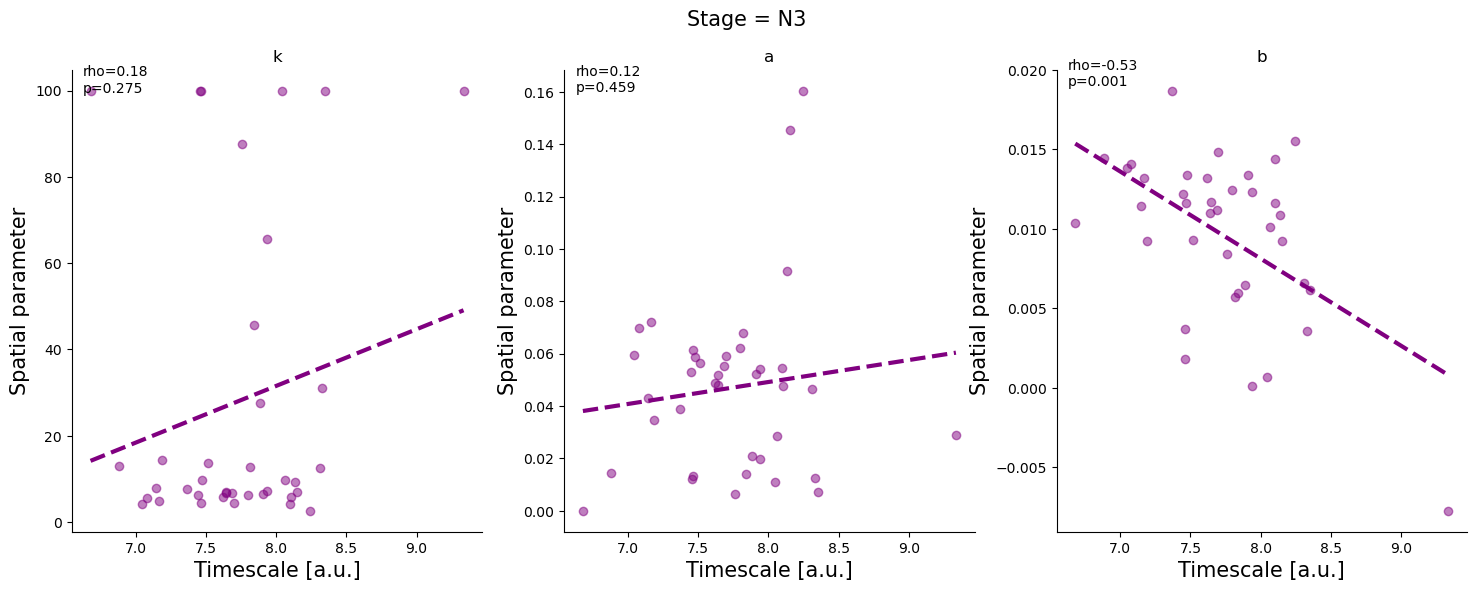

Stage: R, Param: k
Linregress results: r = -0.20865877248253747, p = 0.2086869713330998
Speraman results: r = -0.08659953125822362, p = 0.6051732596068083
Stage: R, Param: a
Linregress results: r = 0.12759605277070524, p = 0.4452199130742317
Speraman results: r = 0.15286136338767917, p = 0.35954959651212237
Stage: R, Param: b
Linregress results: r = -0.1317182299758907, p = 0.4305297374745862
Speraman results: r = -0.2239851187219608, p = 0.176419363349744


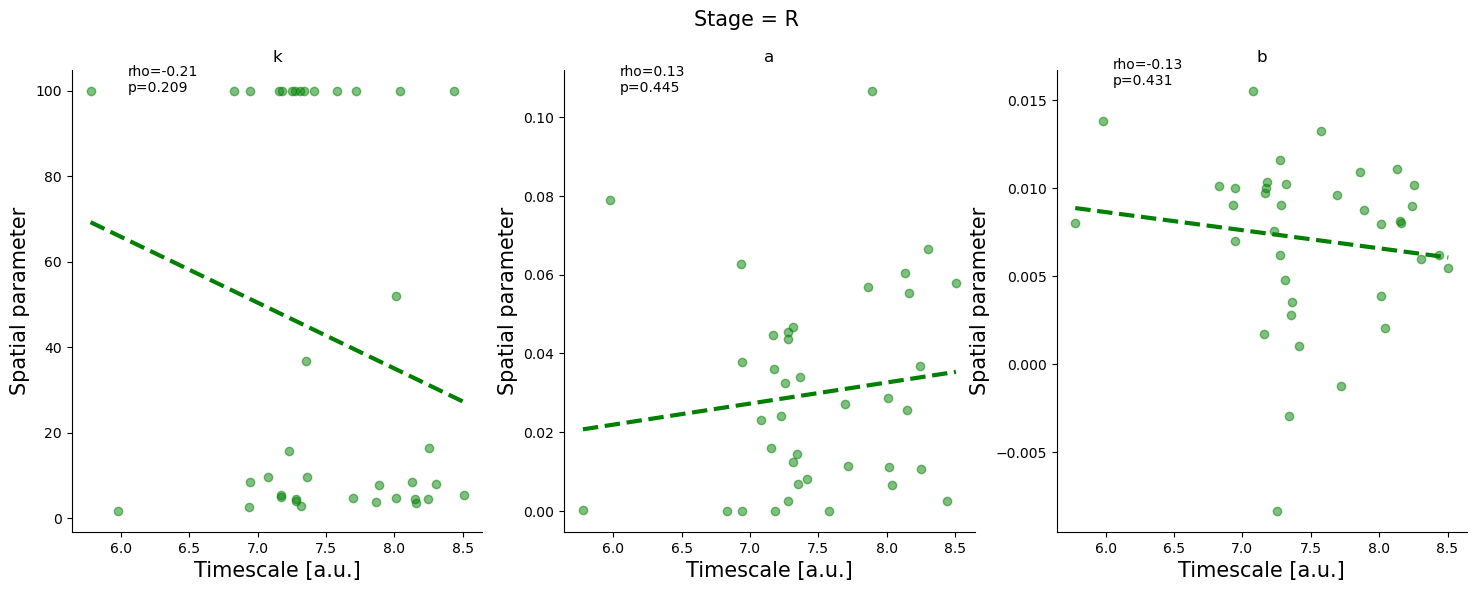

In [13]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mni = uti.get_avg_tau_mni(df_tau_fast[df_tau_fast["stage"] == stage].copy())

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mni_stages_bins[stage][param].astype(float)
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mni, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()

With the MMP atlas division:

Stage: W, Param: k
Linregress results: r = -0.010267163050832835, p = 0.8968266184807352
Speraman results: r = -0.051771981098080934, p = 0.5129275068687094
Stage: W, Param: a
Linregress results: r = -0.023620529061101306, p = 0.7654331044650853
Speraman results: r = -0.07220973211904126, p = 0.3611606922933144
Stage: W, Param: b
Linregress results: r = 0.03648788146116119, p = 0.6448185268072323
Speraman results: r = 0.027225602312292096, p = 0.7309171583993019


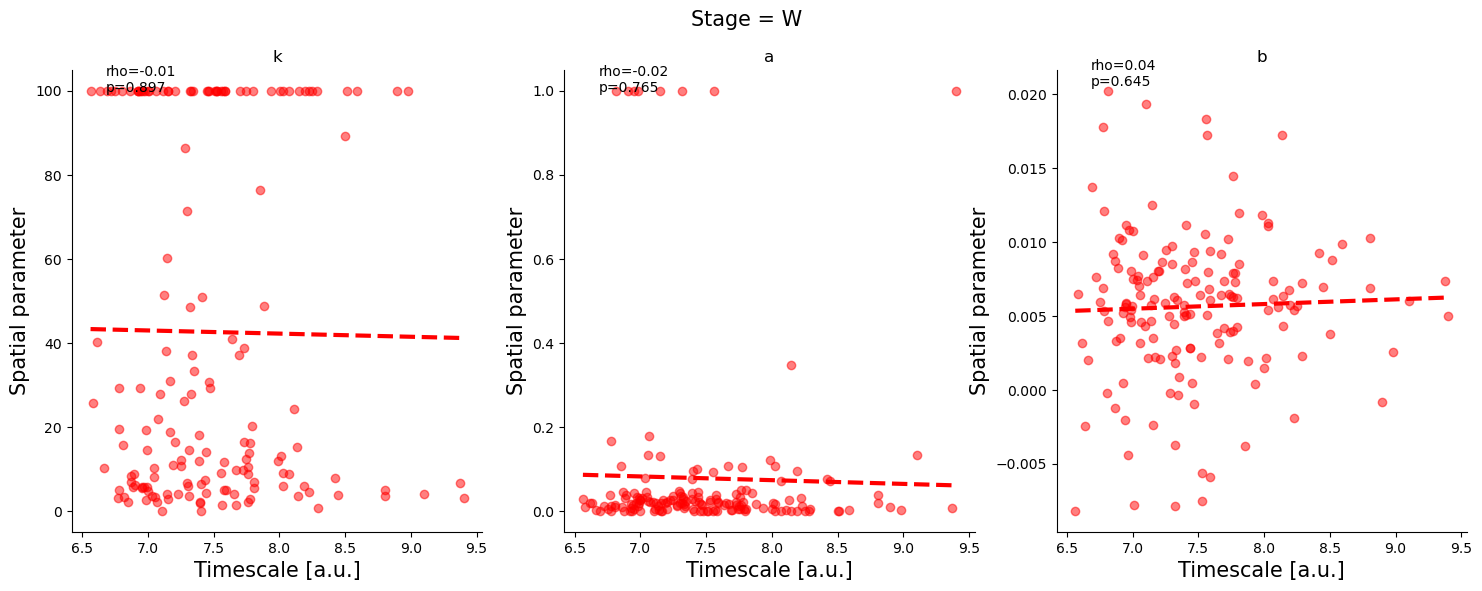

Stage: N3, Param: k
Linregress results: r = -0.09883184954099543, p = 0.21814299641885995
Speraman results: r = -0.040592314334829606, p = 0.6137246536368455
Stage: N3, Param: a
Linregress results: r = 0.021440189118254065, p = 0.7898320801025255
Speraman results: r = 0.026373892172489283, p = 0.7430022459134327
Stage: N3, Param: b
Linregress results: r = -0.019480537799107134, p = 0.8086539653145705
Speraman results: r = -0.08664777132083429, p = 0.28056614503919086


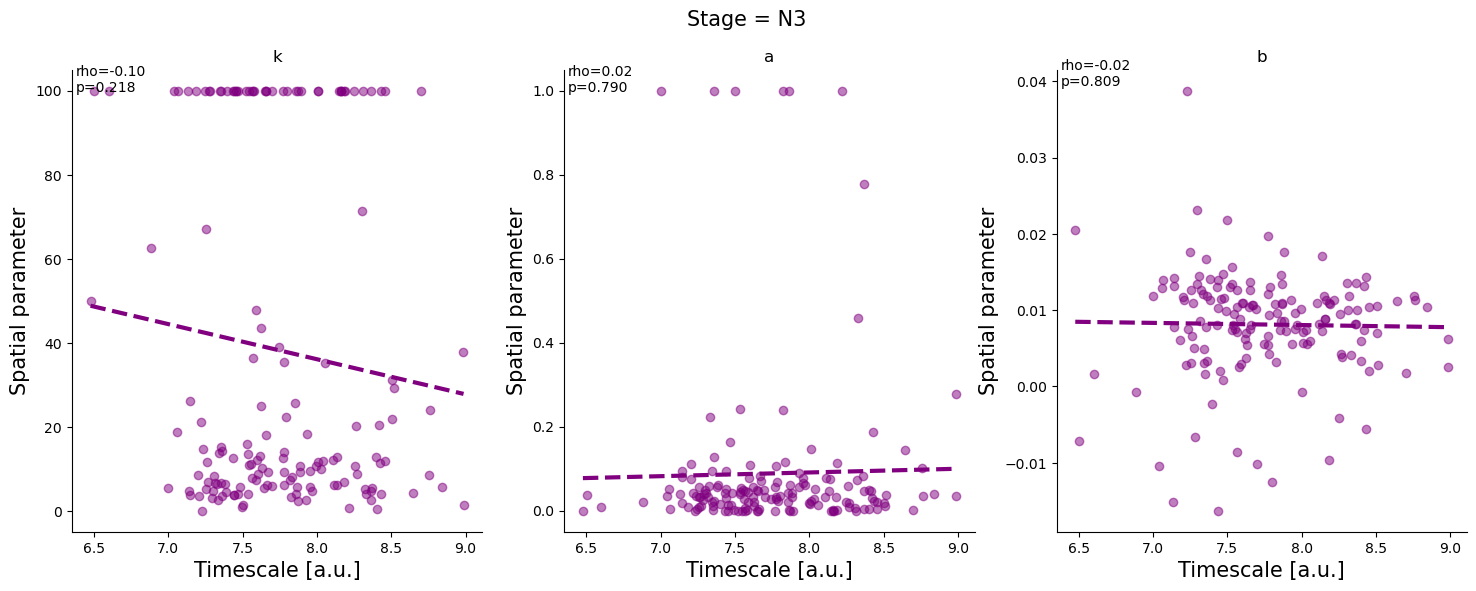

Stage: R, Param: k
Linregress results: r = -0.09878072734565241, p = 0.24217526135365033
Speraman results: r = -0.13729731128835054, p = 0.10323869891742894
Stage: R, Param: a
Linregress results: r = -0.012218396711238352, p = 0.8852497749272086
Speraman results: r = -0.02020576687927629, p = 0.8113570636505179
Stage: R, Param: b
Linregress results: r = 0.13016765782295603, p = 0.12258992382177457
Speraman results: r = 0.1661242563250355, p = 0.0481713749774176


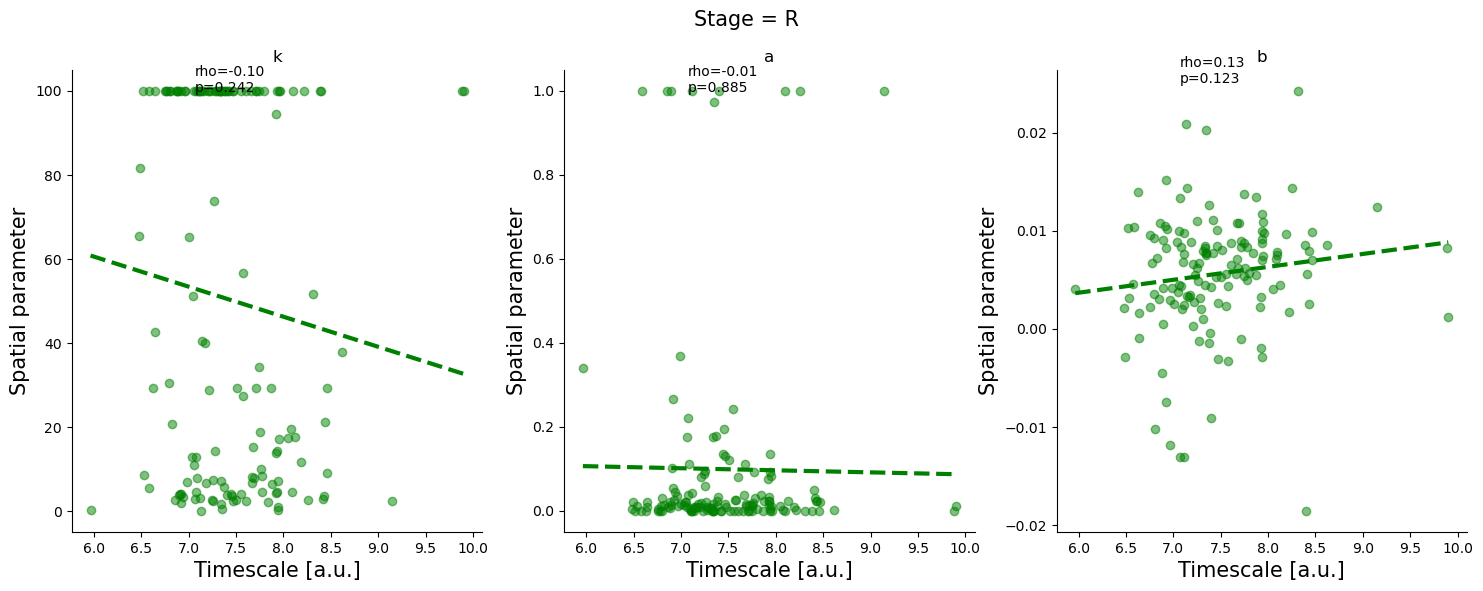

In [14]:
colors_stage = {
    "W": "r",
    "N3": "purple",
    "R": "g"
}

for stage in ["W", "N3", "R"]:

    # Get average tau per MNI region
    df_tau_stage_mmp = df_tau_fast_parc[stage].copy()

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_spa = df_sc_params_mmp_stages_bins[stage][param].astype(float)
        df_spa.dropna(inplace=True)
        # Check same regions are present
        df_tau_stage_mmp = df_tau_stage_mmp[df_tau_stage_mmp.index.isin(df_spa.index)]
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(axs[i], df_tau_stage_mmp, df_spa, title=param, color=colors_stage[stage])
        
    plt.show()